#Rough Set

In [ ]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("bodyfat.csv",sep=',')
df

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,69.96700,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,78.58500,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,69.85300,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,83.80100,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,83.57400,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,60.89500,170.180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
248,1.0236,72,91.17200,177.165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
249,1.0328,72,84.70800,167.640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
250,1.0399,72,86.52300,179.070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


In [ ]:
df=df.iloc[::,1:]         #memisahkan antara variabel x dan y
#df=df.iloc[::,:-1] 
df

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,23,69.96700,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,22,78.58500,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,22,69.85300,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,26,83.80100,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,24,83.57400,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,70,60.89500,170.180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
248,72,91.17200,177.165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
249,72,84.70800,167.640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
250,72,86.52300,179.070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


In [ ]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['class'].value_counts()

In [ ]:
#Encoding dengan data sedikit
#cleanup_nums = {"class": {"Abnormal": 1, "Normal": 2}}
#df = df.replace(cleanup_nums)
#df

#Core and Reduct

In [ ]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [ ]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['BodyFat']=faktor.iloc[::,-1]
    return df_CR

In [ ]:
df_CR=Core_and_Reduct(df)
df_CR.head()

,Age,Weight,Height,BodyFat
0,23,69.967,172.085,12.3
1,22,78.585,183.515,6.1
2,22,69.853,168.275,25.3
3,26,83.801,183.515,10.4
4,24,83.574,180.975,28.7


In [ ]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [ ]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')

In [ ]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

,Unnamed: 0,Age,Weight,Height,BodyFat
0,0,23,69.96700,172.085,12.3
1,1,22,78.58500,183.515,6.1
2,2,22,69.85300,168.275,25.3
3,3,26,83.80100,183.515,10.4
4,4,24,83.57400,180.975,28.7
...,...,...,...,...,...
247,247,70,60.89500,170.180,11.0
248,248,72,91.17200,177.165,33.6
249,249,72,84.70800,167.640,29.3
250,250,72,86.52300,179.070,26.0


In [ ]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

,Age,Weight,Height,BodyFat
0,23,69.96700,172.085,12.3
1,22,78.58500,183.515,6.1
2,22,69.85300,168.275,25.3
3,26,83.80100,183.515,10.4
4,24,83.57400,180.975,28.7
...,...,...,...,...
247,70,60.89500,170.180,11.0
248,72,91.17200,177.165,33.6
249,72,84.70800,167.640,29.3
250,72,86.52300,179.070,26.0


In [ ]:
df_tsk.describe()

,Age,Weight,Height,BodyFat
count,252.000000,252.000000,252.000000,252.000000
mean,44.869048,81.158692,178.177976,19.127381
std,12.567694,13.330694,9.303654,8.341138
min,22.000000,53.751000,74.930000,0.000000
25%,35.750000,72.121500,173.355000,12.475000
50%,43.000000,80.059000,177.800000,19.200000
75%,54.000000,89.358000,183.515000,25.300000
max,81.000000,164.722000,197.485000,47.500000


In [ ]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

Age        0
Weight     0
Height     0
BodyFat    0
dtype: int64

In [ ]:
df_tsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      252 non-null    int64  
 1   Weight   252 non-null    float64
 2   Height   252 non-null    float64
 3   BodyFat  252 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.0 KB


#Info Atribute
1. Age (years)
2. Density
3. Weight (kg)
4. Height (cm)
5. Neck circumference (cm)
6. Chest circumference (cm)
7. Abdomen 2 circumference (cm)
8. Hip circumference (cm)
9. Thigh circumference (cm)
10. Knee circumference (cm)
11. Ankle circumference (cm)
12. Biceps (extended) Circumference (cm) 
13. Forearm circumference (cm)
14. Wrist circumference (cm)
15. bodyfat



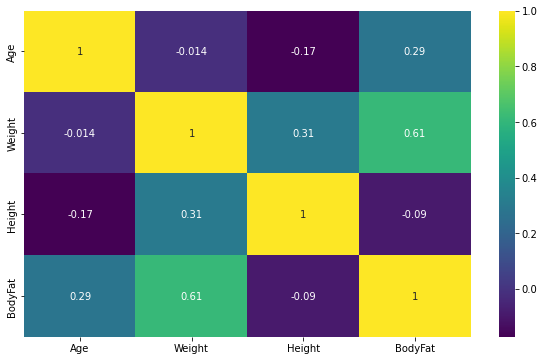

In [ ]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

In [ ]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [ ]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    #hasil = dict_fuzzy[x_i]
    hasil = dict_fuzzy[int(x_i)]   
    return hasil

##Pembentukan Himpunan Fuzzy

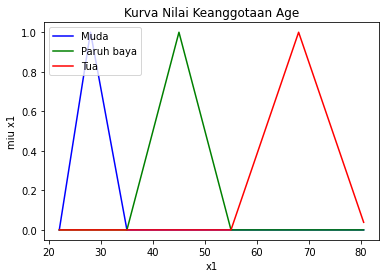

In [ ]:
# Pembentukan Himpunan Fuzzy Age [fungsi buat sendiri]
x_Age = np.arange(22, 81, 0.5) # Semesta Pembicaraan
amb_muda = [22, 28, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 68, 81]

miu_Age_muda = fungsi_segitiga(x_Age, amb_muda)
miu_Age_paruhbaya = fungsi_segitiga(x_Age, amb_paruhbaya)
miu_Age_tua = fungsi_segitiga(x_Age, amb_tua)

import matplotlib.pyplot as plt
plt.plot(x_Age, miu_Age_muda, label = "Muda", color='blue')
plt.plot(x_Age, miu_Age_paruhbaya, label = "Paruh baya", color='green')
plt.plot(x_Age, miu_Age_tua, label = "Tua", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Age')
plt.legend()
plt.show()

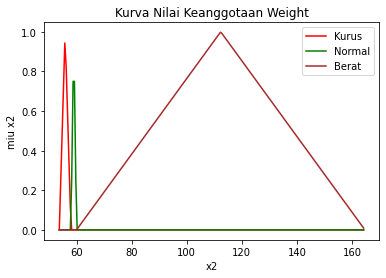

In [ ]:
# Pembentukan Himpunan Fuzzy Weight [fungsi buat sendiri]
x_Weight	= np.arange(53.75, 164.72, 0.5) # Semesta  Pembicaraan niali data kita
amb_kurus= [53.75, 55.87, 58]           #nilai interval dr teori 
amb_normal = [58, 59, 60]   
amb_berat = [60, 112.36, 164.72] 
 
miu_Weight_kurus = fungsi_segitiga(x_Weight, amb_kurus)
miu_Weight_normal = fungsi_segitiga(x_Weight, amb_normal)
miu_Weight_berat = fungsi_segitiga(x_Weight, amb_berat)

import matplotlib.pyplot as plt
plt.plot(x_Weight, miu_Weight_kurus, label = "Kurus", color='red')
plt.plot(x_Weight, miu_Weight_normal, label = "Normal", color='green')
plt.plot(x_Weight, miu_Weight_berat, label = "Berat", color='brown')

plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan Weight')
plt.legend()
plt.show()

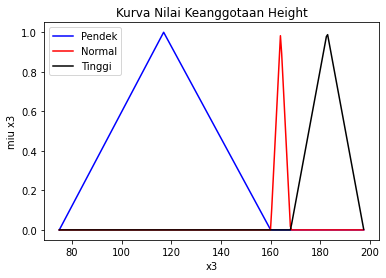

In [ ]:
# Pembentukan Himpunan Fuzzy Height[fungsi buat sendiri]
x_Height	= np.arange(74.93, 197.49, 0.5) # Semesta  Pembicaraan niali data kita
amb_pendek= [74.93, 116.93,160 ]           #nilai interval dr teori 
amb_normal = [160, 164, 168]   
amb_tinggi = [168, 182.75, 197.49 ] 

miu_Height_pendek = fungsi_segitiga(x_Height, amb_pendek)
miu_Height_normal = fungsi_segitiga(x_Height, amb_normal)
miu_Height_tinggi = fungsi_segitiga(x_Height, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_Height, miu_Height_pendek, label = "Pendek", color='blue')
plt.plot(x_Height, miu_Height_normal, label = "Normal", color='red')
plt.plot(x_Height, miu_Height_tinggi, label = "Tinggi", color='black')

plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Height')
plt.legend()
plt.show()

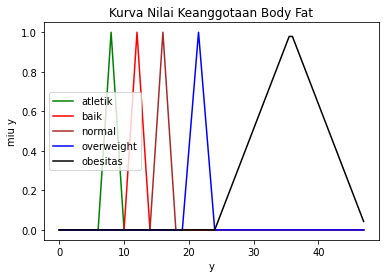

In [ ]:
# Pembentukan Himpunan Fuzzy Body Fat [fungsi buat sendiri]
x_BodyFat	= np.arange(0, 47.5, 0.5) #  Semesta Pembicaraan nilai data kita

amb_atletik = [6, 8, 10]
amb_baik = [10, 12, 14]
amb_normal = [14, 16, 18]
amb_overweight = [19, 21.5, 24]
amb_obesitas = [24, 35.75, 47.5]

miu_BodyFat_atletik = fungsi_segitiga(x_BodyFat, amb_atletik)
miu_BodyFat_baik = fungsi_segitiga(x_BodyFat, amb_baik)
miu_BodyFat_normal = fungsi_segitiga(x_BodyFat, amb_normal)
miu_BodyFat_overweight = fungsi_segitiga(x_BodyFat, amb_overweight)
miu_BodyFat_obesitas = fungsi_segitiga(x_BodyFat, amb_obesitas)

import matplotlib.pyplot as plt
plt.plot(x_BodyFat, miu_BodyFat_atletik, label = "atletik", color='green')
plt.plot(x_BodyFat, miu_BodyFat_baik, label = "baik", color='red')
plt.plot(x_BodyFat, miu_BodyFat_normal, label = "normal", color='brown')
plt.plot(x_BodyFat, miu_BodyFat_overweight, label = "overweight", color='blue')
plt.plot(x_BodyFat, miu_BodyFat_obesitas , label = "obesitas", color='black')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Body Fat')
plt.legend()
plt.show()

#Perhitungan Nilai Miu

In [ ]:
#X1 AGE
def fuzzyfikasi(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-68
    tengah = awal+20

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x1
x_Age= np.arange(22, 82, 0.5) # Semesta Pembicaraan
amb_muda = [22, 28, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 68, 81]

fuzzifikasi_Age=[]
miu_Age=[]
for i in df.Age:
    hasil=fuzzyfikasi(x_Age, amb_muda, amb_paruhbaya, amb_tua, i, "Muda", "Paruhbaya", "Tua")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Age.append(fuzz)
    miu_Age.append(m)
    
len(fuzzifikasi_Age)

103.5
35.5
55.5
{22.0: 0.0, 22.5: 0.08333333333333333, 23.0: 0.16666666666666666, 23.5: 0.25, 24.0: 0.3333333333333333, 24.5: 0.4166666666666667, 25.0: 0.5, 25.5: 0.5833333333333334, 26.0: 0.6666666666666666, 26.5: 0.75, 27.0: 0.8333333333333334, 27.5: 0.9166666666666666, 28.0: 1.0, 28.5: 0.9285714285714286, 29.0: 0.8571428571428571, 29.5: 0.7857142857142857, 30.0: 0.7142857142857143, 30.5: 0.6428571428571429, 31.0: 0.5714285714285714, 31.5: 0.5, 32.0: 0.42857142857142855, 32.5: 0.35714285714285715, 33.0: 0.2857142857142857, 33.5: 0.21428571428571427, 34.0: 0.14285714285714285, 34.5: 0.07142857142857142, 35.0: 0.0, 35.5: 0.0, 36.0: 0.0, 36.5: 0.0, 37.0: 0.0, 37.5: 0.0, 38.0: 0.0, 38.5: 0.0, 39.0: 0.0, 39.5: 0.0, 40.0: 0.0, 40.5: 0.0, 41.0: 0.0, 41.5: 0.0, 42.0: 0.0, 42.5: 0.0, 43.0: 0.0, 43.5: 0.0, 44.0: 0.0, 44.5: 0.0, 45.0: 0.0, 45.5: 0.0, 46.0: 0.0, 46.5: 0.0, 47.0: 0.0, 47.5: 0.0, 48.0: 0.0, 48.5: 0.0, 49.0: 0.0, 49.5: 0.0, 50.0: 0.0, 50.5: 0.0, 51.0: 0.0, 51.5: 0.0, 52.0: 0.0, 52.

252

In [ ]:
#X2 (WEIGHT)
def fuzzyfikasi1(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas   = (max(x_array)+min(x_array))/3
    awal    = batas-14.82
    tengah  = awal+18

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal< x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x2
x_Weight	= np.arange(53, 165, 0.5) # Semesta  Pembicaraan niali data kita
amb_kurus= [53.75, 55.87, 58]           #nilai interval dr teori 
amb_normal = [58, 59, 60]   
amb_berat = [60, 112.36, 164.72] 

fuzzifikasi_Weight=[]
miu_Weight=[]
for i in df.Weight:
    hasil=fuzzyfikasi1(x_Weight, amb_kurus, amb_normal, amb_berat, i, "Kurus", "Normal", "Berat")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Weight.append(fuzz)
    miu_Weight.append(m)
    
len(fuzzifikasi_Weight)

72.5
57.68
75.68
{53.0: 0.0, 53.5: 0.0, 54.0: 0.0, 54.5: 0.0, 55.0: 0.0, 55.5: 0.0, 56.0: 0.0, 56.5: 0.0, 57.0: 0.0, 57.5: 0.0, 58.0: 0.0, 58.5: 0.5, 59.0: 1.0, 59.5: 0.5, 60.0: 0.0, 60.5: 0.0, 61.0: 0.0, 61.5: 0.0, 62.0: 0.0, 62.5: 0.0, 63.0: 0.0, 63.5: 0.0, 64.0: 0.0, 64.5: 0.0, 65.0: 0.0, 65.5: 0.0, 66.0: 0.0, 66.5: 0.0, 67.0: 0.0, 67.5: 0.0, 68.0: 0.0, 68.5: 0.0, 69.0: 0.0, 69.5: 0.0, 70.0: 0.0, 70.5: 0.0, 71.0: 0.0, 71.5: 0.0, 72.0: 0.0, 72.5: 0.0, 73.0: 0.0, 73.5: 0.0, 74.0: 0.0, 74.5: 0.0, 75.0: 0.0, 75.5: 0.0, 76.0: 0.0, 76.5: 0.0, 77.0: 0.0, 77.5: 0.0, 78.0: 0.0, 78.5: 0.0, 79.0: 0.0, 79.5: 0.0, 80.0: 0.0, 80.5: 0.0, 81.0: 0.0, 81.5: 0.0, 82.0: 0.0, 82.5: 0.0, 83.0: 0.0, 83.5: 0.0, 84.0: 0.0, 84.5: 0.0, 85.0: 0.0, 85.5: 0.0, 86.0: 0.0, 86.5: 0.0, 87.0: 0.0, 87.5: 0.0, 88.0: 0.0, 88.5: 0.0, 89.0: 0.0, 89.5: 0.0, 90.0: 0.0, 90.5: 0.0, 91.0: 0.0, 91.5: 0.0, 92.0: 0.0, 92.5: 0.0, 93.0: 0.0, 93.5: 0.0, 94.0: 0.0, 94.5: 0.0, 95.0: 0.0, 95.5: 0.0, 96.0: 0.0, 96.5: 0.0, 97.0: 0.0, 97.

252

In [ ]:
#X3 (HEIGHT)
def fuzzyfikasi2(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas   = (max(x_array)+min(x_array))/2
    awal    = batas+23.79
    tengah  = awal+8

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal< x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#Miu x3
x_Height	= np.arange(73, 197.49, 0.5) # Semesta  Pembicaraan niali data kita
amb_pendek= [74.93, 116.93,160 ]           #nilai interval dr teori 
amb_normal = [160, 164, 168]   
amb_tinggi = [168, 182.75, 197.49 ] 

fuzzifikasi_Height=[]
miu_Height=[]
for i in df.Height:
    hasil=fuzzyfikasi2(x_Height, amb_pendek, amb_normal, amb_tinggi, i, "Pendek", "Normal", "Tinggi")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_Height.append(fuzz)
    miu_Height.append(m)
len(fuzzifikasi_Height)

135.0
158.79
166.79
{73.0: 0.0, 73.5: 0.0, 74.0: 0.0, 74.5: 0.0, 75.0: 0.0, 75.5: 0.0, 76.0: 0.0, 76.5: 0.0, 77.0: 0.0, 77.5: 0.0, 78.0: 0.0, 78.5: 0.0, 79.0: 0.0, 79.5: 0.0, 80.0: 0.0, 80.5: 0.0, 81.0: 0.0, 81.5: 0.0, 82.0: 0.0, 82.5: 0.0, 83.0: 0.0, 83.5: 0.0, 84.0: 0.0, 84.5: 0.0, 85.0: 0.0, 85.5: 0.0, 86.0: 0.0, 86.5: 0.0, 87.0: 0.0, 87.5: 0.0, 88.0: 0.0, 88.5: 0.0, 89.0: 0.0, 89.5: 0.0, 90.0: 0.0, 90.5: 0.0, 91.0: 0.0, 91.5: 0.0, 92.0: 0.0, 92.5: 0.0, 93.0: 0.0, 93.5: 0.0, 94.0: 0.0, 94.5: 0.0, 95.0: 0.0, 95.5: 0.0, 96.0: 0.0, 96.5: 0.0, 97.0: 0.0, 97.5: 0.0, 98.0: 0.0, 98.5: 0.0, 99.0: 0.0, 99.5: 0.0, 100.0: 0.0, 100.5: 0.0, 101.0: 0.0, 101.5: 0.0, 102.0: 0.0, 102.5: 0.0, 103.0: 0.0, 103.5: 0.0, 104.0: 0.0, 104.5: 0.0, 105.0: 0.0, 105.5: 0.0, 106.0: 0.0, 106.5: 0.0, 107.0: 0.0, 107.5: 0.0, 108.0: 0.0, 108.5: 0.0, 109.0: 0.0, 109.5: 0.0, 110.0: 0.0, 110.5: 0.0, 111.0: 0.0, 111.5: 0.0, 112.0: 0.0, 112.5: 0.0, 113.0: 0.0, 113.5: 0.0, 114.0: 0.0, 114.5: 0.0, 115.0: 0.0, 115.5: 0.0, 1

252

In [ ]:
#Y (BODYFAT)
def fuzzyfikasi4(x_array, amd_1, amd_2, amd_3, amd_4, amd_5, x, label_1, label_2, label_3, label_4, label_5):
    batas = (max(x_array)+min(x_array))/2
    awal  = batas-16.75
    tengah = awal+4
    akhir1 = tengah+4
    akhir2 = akhir1+6

    print(batas)
    hasil=0
    if x <=awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif batas < x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil= label_2
    elif tengah < x <= akhir1:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil= label_3
    elif akhir1 < x <= akhir2:
        hasil=miu_fungsi_segitiga(x_array, amd_4, x)
        label_hasil= label_4
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_5, x)
        label_hasil = label_5
    return hasil, label_hasil

In [ ]:
#Miu y 
x_BodyFat	= np.arange(0, 47.5, 0.5) #  Semesta Pembicaraan nilai data kita
amb_atletik = [6, 8, 10]
amb_baik = [11, 12.5, 14]
amb_normal = [15, 16.5, 18]
amb_overweight = [19, 21.5, 24]
amb_obesitas = [25, 36.25, 47.5]

fuzzifikasi_BodyFat=[]
miu_BodyFat=[]
for i in df.BodyFat:
    hasil=fuzzyfikasi4(x_BodyFat, amb_atletik, amb_baik, amb_normal, amb_overweight, amb_obesitas, i, "atletik", "baik", "normal", "overweight", "obesitas")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_BodyFat.append(fuzz)
    miu_BodyFat.append(m)
len(fuzzifikasi_BodyFat)

23.5
{0.0: 0.0, 0.5: 0.0, 1.0: 0.0, 1.5: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 3.5: 0.0, 4.0: 0.0, 4.5: 0.0, 5.0: 0.0, 5.5: 0.0, 6.0: 0.0, 6.5: 0.0, 7.0: 0.0, 7.5: 0.0, 8.0: 0.0, 8.5: 0.0, 9.0: 0.0, 9.5: 0.0, 10.0: 0.0, 10.5: 0.0, 11.0: 0.0, 11.5: 0.0, 12.0: 0.0, 12.5: 0.0, 13.0: 0.0, 13.5: 0.0, 14.0: 0.0, 14.5: 0.0, 15.0: 0.0, 15.5: 0.3333333333333333, 16.0: 0.6666666666666666, 16.5: 1.0, 17.0: 0.6666666666666666, 17.5: 0.3333333333333333, 18.0: 0.0, 18.5: 0.0, 19.0: 0.0, 19.5: 0.0, 20.0: 0.0, 20.5: 0.0, 21.0: 0.0, 21.5: 0.0, 22.0: 0.0, 22.5: 0.0, 23.0: 0.0, 23.5: 0.0, 24.0: 0.0, 24.5: 0.0, 25.0: 0.0, 25.5: 0.0, 26.0: 0.0, 26.5: 0.0, 27.0: 0.0, 27.5: 0.0, 28.0: 0.0, 28.5: 0.0, 29.0: 0.0, 29.5: 0.0, 30.0: 0.0, 30.5: 0.0, 31.0: 0.0, 31.5: 0.0, 32.0: 0.0, 32.5: 0.0, 33.0: 0.0, 33.5: 0.0, 34.0: 0.0, 34.5: 0.0, 35.0: 0.0, 35.5: 0.0, 36.0: 0.0, 36.5: 0.0, 37.0: 0.0, 37.5: 0.0, 38.0: 0.0, 38.5: 0.0, 39.0: 0.0, 39.5: 0.0, 40.0: 0.0, 40.5: 0.0, 41.0: 0.0, 41.5: 0.0, 42.0: 0.0, 42.5: 0.0, 43.0: 0.

252

In [ ]:
df_fuzz = pd.DataFrame({"Age":df.Age,
                        "Weight":df.Weight,
                        "Height":df.Height,
                        "BodyFat":df.BodyFat,
                        "Age_fuzz": fuzzifikasi_Age,
                        "Weight_fuzz": fuzzifikasi_Weight,
                        "Height_fuzz": fuzzifikasi_Height,
                        "BodyFat_fuzz": fuzzifikasi_BodyFat,
                        "miu_Age":miu_Age,
                        "miu_Weight":miu_Weight,
                        "miu_Height":miu_Height,
                        "miu_BodyFat":miu_BodyFat,})
df_fuzz

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
0,23,69.96700,172.085,12.3,Muda,Normal,Tinggi,normal,0.166667,0.000000,0.271186,0.000000
1,22,78.58500,183.515,6.1,Muda,Berat,Tinggi,atletik,0.000000,0.343774,0.983039,0.000000
2,22,69.85300,168.275,25.3,Muda,Normal,Tinggi,obesitas,0.000000,0.000000,0.000000,0.000000
3,26,83.80100,183.515,10.4,Muda,Berat,Tinggi,obesitas,0.666667,0.439267,0.983039,0.000000
4,24,83.57400,180.975,28.7,Muda,Berat,Tinggi,obesitas,0.333333,0.439267,0.813559,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...
247,70,60.89500,170.180,11.0,Tua,Normal,Tinggi,normal,0.846154,0.000000,0.135593,0.000000
248,72,91.17200,177.165,33.6,Tua,Berat,Tinggi,obesitas,0.692308,0.592055,0.610169,0.711111
249,72,84.70800,167.640,29.3,Tua,Berat,Tinggi,obesitas,0.692308,0.458365,0.000000,0.355556
250,72,86.52300,179.070,26.0,Tua,Berat,Tinggi,obesitas,0.692308,0.496562,0.745763,0.088889


# Rule Generation

In [ ]:
df_fuzz['Rule'] = "Jika X1 " + df_fuzz['Age_fuzz'] + " X2 " + df_fuzz['Weight_fuzz'] + " X3 " + df_fuzz['Height_fuzz'] + " maka Y " + df_fuzz['BodyFat_fuzz']

In [ ]:
df_fuzz.to_excel('hasilRuleSGD.xlsx') 

In [ ]:
df_fuzz['Rule'].value_counts()

Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y obesitas       56
Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y overweight     27
Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas             23
Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas            19
Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y normal        16
Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y obesitas      15
Jika X1 Muda X2 Berat X3 Tinggi maka Y overweight          12
Jika X1 Muda X2 Normal X3 Tinggi maka Y obesitas           10
Jika X1 Tua X2 Normal X3 Tinggi maka Y obesitas             9
Jika X1 Tua X2 Berat X3 Tinggi maka Y overweight            8
Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y overweight     7
Jika X1 Paruhbaya X2 Normal X3 Tinggi maka Y atletik        7
Jika X1 Muda X2 Berat X3 Tinggi maka Y normal               6
Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y normal          4
Jika X1 Tua X2 Normal X3 Tinggi maka Y overweight           4
Jika X1 Muda X2 Normal X3 Tinggi maka Y normal              4
Jika X1 

# TSK Prediction

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [ ]:
rule_1 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y obesitas"]
index=rule_1.index
data_rule_1=df_fuzz.iloc[index,:4]
X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])
data_rule_1.head()

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,Rule
33,41,99.110,180.340,21.3,Paruhbaya,Berat,Tinggi,obesitas,0.6,0.744843,0.813559,0.000000,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
34,41,112.151,186.690,32.3,Paruhbaya,Berat,Tinggi,obesitas,0.6,0.993125,0.779512,0.622222,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
36,40,91.739,177.800,24.2,Paruhbaya,Berat,Tinggi,obesitas,0.5,0.592055,0.610169,0.000000,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
37,50,89.244,173.355,28.4,Paruhbaya,Berat,Tinggi,obesitas,0.5,0.553858,0.338983,0.266667,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
38,46,164.722,183.515,35.2,Paruhbaya,Berat,Tinggi,obesitas,0.9,0.013751,0.983039,0.888889,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...


In [ ]:
rule_1.to_csv('hasilrule1.csv') 

###Stochastic Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1.head()

,Unnamed: 0,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,Rule
0,33,41,99.110,180.340,21.3,Paruhbaya,Berat,Tinggi,obesitas,0.6,0.744843,0.813559,0.000000,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
1,34,41,112.151,186.690,32.3,Paruhbaya,Berat,Tinggi,obesitas,0.6,0.993125,0.779512,0.622222,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
2,36,40,91.739,177.800,24.2,Paruhbaya,Berat,Tinggi,obesitas,0.5,0.592055,0.610169,0.000000,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
3,37,50,89.244,173.355,28.4,Paruhbaya,Berat,Tinggi,obesitas,0.5,0.553858,0.338983,0.266667,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
4,38,46,164.722,183.515,35.2,Paruhbaya,Berat,Tinggi,obesitas,0.9,0.013751,0.983039,0.888889,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...


In [ ]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1.head()

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,Rule
0,41,99.110,180.340,21.3,Paruhbaya,Berat,Tinggi,obesitas,0.6,0.744843,0.813559,0.000000,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
1,41,112.151,186.690,32.3,Paruhbaya,Berat,Tinggi,obesitas,0.6,0.993125,0.779512,0.622222,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
2,40,91.739,177.800,24.2,Paruhbaya,Berat,Tinggi,obesitas,0.5,0.592055,0.610169,0.000000,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
3,50,89.244,173.355,28.4,Paruhbaya,Berat,Tinggi,obesitas,0.5,0.553858,0.338983,0.266667,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...
4,46,164.722,183.515,35.2,Paruhbaya,Berat,Tinggi,obesitas,0.9,0.013751,0.983039,0.888889,Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y ob...


In [ ]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('BodyFat',axis='columns'))
scaled_y1= sy1.fit_transform(data_rule_1['BodyFat'].values.reshape(rule_1.shape[0],1))

scaled_X1

ValueError: ignored

In [ ]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

In [ ]:
def stochastic_gradient_descent_rule1(X1, y1, iterasi, learning_rate = 0.001):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = np.random.RandomState(seed=42).randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x1 = X1[random_index]
        sample_y1 = y1[random_index]
        
        y1_pred = np.dot(bpoly_rule1, sample_x1.T) + b0_rule1                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_rule1_grad = -(2/n)*(sample_x1.T.dot(sample_y1-y1_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_rule1_grad = -(2/n)*np.sum(sample_y1-y1_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad               # Memperbaharui bpoly setiap iterasi
        b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv_rule1 in range(jumlah_variabel_rule1):
            bp_rule1=bpoly_rule1[jv_rule1]
            bp.append(bp_rule1)
        b_rule1=[b0_rule1]+bp
        
        cost_rule1 = np.mean(np.square(sample_y1-y1_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                        # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [ ]:
import time
mulai_rule1 = time.time()
s_bpoly_rule1, s_b0_rule1, s_cost_rule1, s_b_rule1_list, s_cost_rule1_list, s_iterasi_rule1_list=stochastic_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                    scaled_y1_reshape,
                                                                                                                                    iterasi=10000,
                                                                                                                                    learning_rate = 0.001)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

In [ ]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Stochastic Gradient Descent Rule 1")
plt.plot(s_iterasi_rule1_list,s_cost_rule1_list, color='red', label='Eror')
plt.show()

In [ ]:
s_cost_rule1

In [ ]:
s_b0_rule1

In [ ]:
s_bpoly_rule1 #hasil untuk x1 dan x2

In [ ]:
data_rule_1

In [ ]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

In [ ]:
Y1=np.array(data_rule_1.iloc[:,3])  #mengambil angka dari kolom
Y1

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1